<a href="https://colab.research.google.com/github/NWemphy/MachineLearningB_/blob/main/Klastering_PengunjungMall_225314043.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as py

In [42]:
df = pd.read_csv("Pengunjung_mall.csv", sep = ",")

In [43]:
df

,IDPelanggan,Kelamin,Usia,Pendapatan (juta Rp),Rating_pengeluaran (1-100)
0,1,Laki,19,15,39
1,2,Laki,21,15,81
2,3,Perempuan,20,16,6
3,4,Perempuan,23,16,77
4,5,Perempuan,31,17,40
...,...,...,...,...,...
195,196,Perempuan,35,120,79
196,197,Perempuan,45,126,28
197,198,Laki,32,126,74
198,199,Laki,32,137,18


In [44]:
Klaster_data = df[['Usia', 'Pendapatan (juta Rp)', 'Rating_pengeluaran (1-100)']]

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
Scaler = StandardScaler()
data_baru = Scaler.fit_transform(Klaster_data)

In [47]:
from sklearn.cluster import KMeans

In [48]:
#
wcss = []
K_range = range(1,11)

for k in K_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_baru)
    wcss.append(kmeans.inertia_)

In [49]:
import matplotlib.pyplot as plt

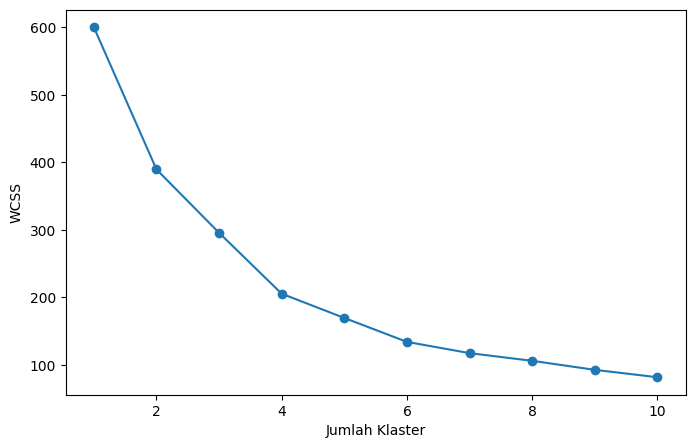

In [50]:
plt.figure(figsize=( 8,5))
plt.plot(K_range, wcss, marker = 'o')
plt.xlabel('Jumlah Klaster')
plt.ylabel('WCSS')
plt.show()

In [56]:
pip install kneed

In [57]:
from kneed import KneeLocator

kl = KneeLocator(K_range, wcss, curve='convex', direction='decreasing')

In [58]:
kl.elbow

4

In [59]:
from sklearn.metrics import silhouette_score

In [64]:
nilai_silhouette = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_baru)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(data_baru, labels)
    nilai_silhouette.append(silhouette_avg)

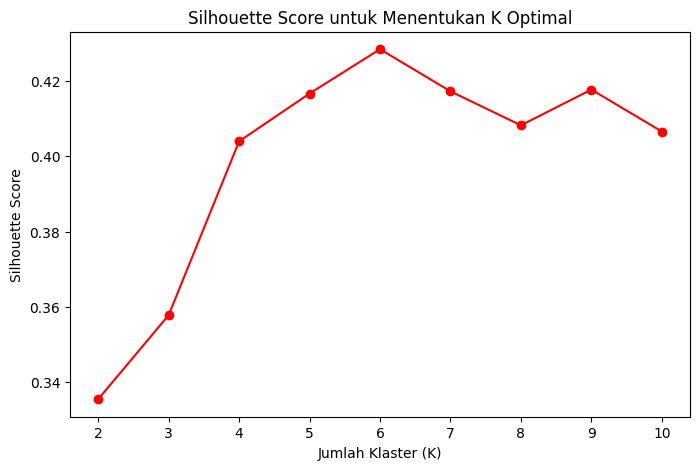

In [65]:
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), nilai_silhouette, marker='o', linestyle='-', color='r')
plt.xlabel('Jumlah Klaster (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Menentukan K Optimal')
plt.show()

In [67]:
optimal_k = 6

In [68]:
kmeans = KMeans(n_clusters = optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(data_baru)

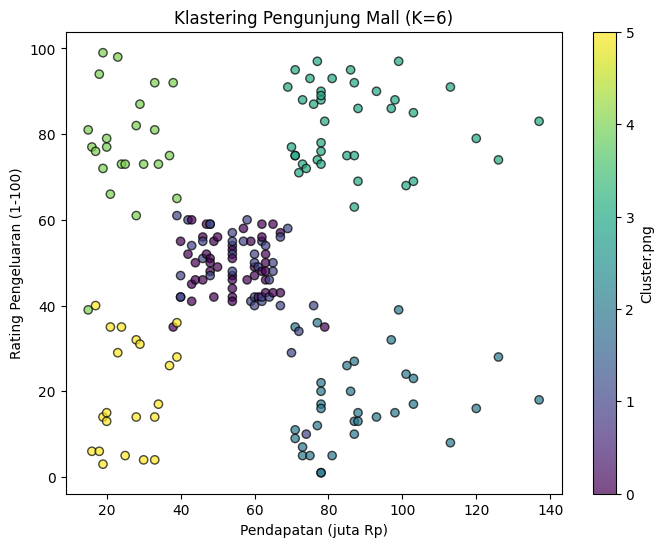

In [69]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Pendapatan (juta Rp)'], df['Rating_pengeluaran (1-100)'],
            c=df['Cluster'], cmap='viridis', edgecolors='k', alpha=0.7)
plt.xlabel('Pendapatan (juta Rp)')
plt.ylabel('Rating Pengeluaran (1-100)')
plt.title(f'Klastering Pengunjung Mall (K={optimal_k})')
plt.colorbar(label='Cluster.png')
plt.show()